In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
# Loading data and reading data
data= pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
# Checking number of rows and columns
data.shape

(9, 7)

In [4]:
# Checking the basic informations 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
# Checking the null values
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2. Reset the index as "name".

In [6]:
# resetting name as index
data1= data.set_index("name")
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
#locating rows of specific name

data1.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
# selecting data for values sales and finance

data1.loc[data1['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [9]:
Score_700= data1['performance_score']>700
data1.loc[Score_700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
Score_500_700= (data1['performance_score']<700) & (data1['performance_score']>500)
data1.loc[Score_500_700]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [11]:
data1.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [12]:
# Handling the NaN in age using median
data1['age']=data1['age'].fillna(data1['age'].median())

# Handling the Nan in income using mean
data1['income']= data1['income'].fillna(data1['income'].mean())

# Handling the NaN in gender using mode
data1['gender']= data1['gender'].fillna(data1['gender'].mode()[0])
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [13]:
data1.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

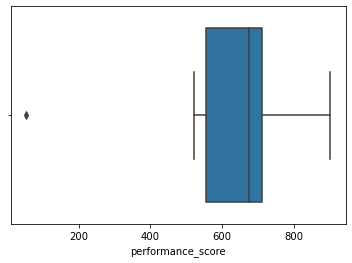

In [15]:
# Checking for outliers using boxplot
sns.boxplot(data1['performance_score'])

In [24]:
Q1=np.percentile(data1['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data1['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data1['performance_score'],75,interpolation='midpoint')
print("The values of Q1, Q2, Q3 are:",'\n', Q1, Q2, Q3)
IQR=Q3-Q1
print("IQR value= ",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print('UPPER LIMIT = ',upp_limit)
print('LOWER LIMIT = ',low_limit)
outlier=[]
for i in data1['performance_score']:
    if((i>upp_limit) | (i<low_limit)):
        outlier.append(i)
print("outlier = ",outlier)

The values of Q1, Q2, Q3 are: 
 556.0 674.0 711.0
IQR value=  155.0
UPPER LIMIT =  943.5
LOWER LIMIT =  323.5
outlier =  [53]


In [29]:
# Locating the outlier row
data1.loc[data1['performance_score']<low_limit].index

Index(['James Authur'], dtype='object', name='name')

In [37]:
# Dropping the outlier value
data2= data1.drop(['James Authur'])
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [36]:
# Doing dummy encoding to gender variable

Dummy = pd.get_dummies(data2, columns=["gender"])
Dummy

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


# 10. Do the standard scaling on the feature performance score.

In [45]:
# Transforming performance score into sta
col=['performance_score']
feature=data2[col]
scaler=StandardScaler().fit(feature.values)
feature=scaler.transform(feature.values)
data2[col]=feature
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,0.392262
S Kumar,45.0,16000.000000,F,Finance,G0,-1.475872
Jack Morgan,32.0,35000.000000,M,Finance,G2,-0.058667
Ying Chin,45.0,65000.000000,F,Sales,G3,-1.144578
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,0.281831
Satyam Sharma,45.0,62000.000000,F,Sales,G3,-0.288733
Josh Wills,54.0,52000.000000,F,Finance,G3,2.030331
Leo Duck,23.0,98000.000000,M,Sales,G4,0.263425
